# **MODERN COMPUTER VISION** #
##### BY RAJEEV RATAN

<h2 style="margin-bottom:0;">🚀 Perspective Transforms</h2>

<h5 style="margin-top:5px;">In this lesson we'll learn:</h5>

<p style="margin-top:0;">
1️⃣ Use OpenCV's getPerspectiveTransform <br>
2️⃣ Use findContours to get corners and automate perspective Transform <br>
</p>

In [1]:
# Our Setup, Import Libraries and Create our Imshow Function
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Define our imshow function
def imshow(title = "Image", image = None, size = 10):
    w, h = image.shape[0], image.shape[1]
    aspect_ratio = w/h
    plt.figure(figsize=(size * aspect_ratio, size))
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title(title)
    plt.show()

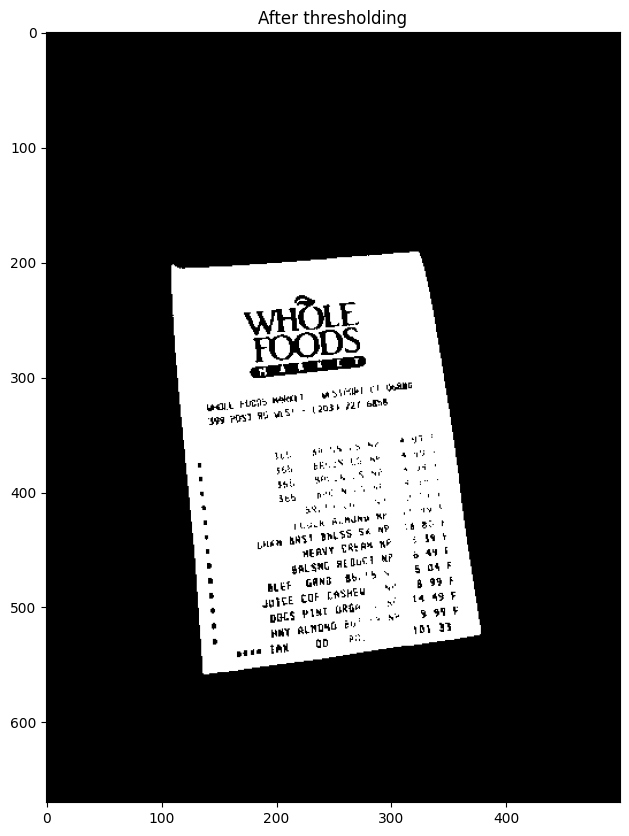

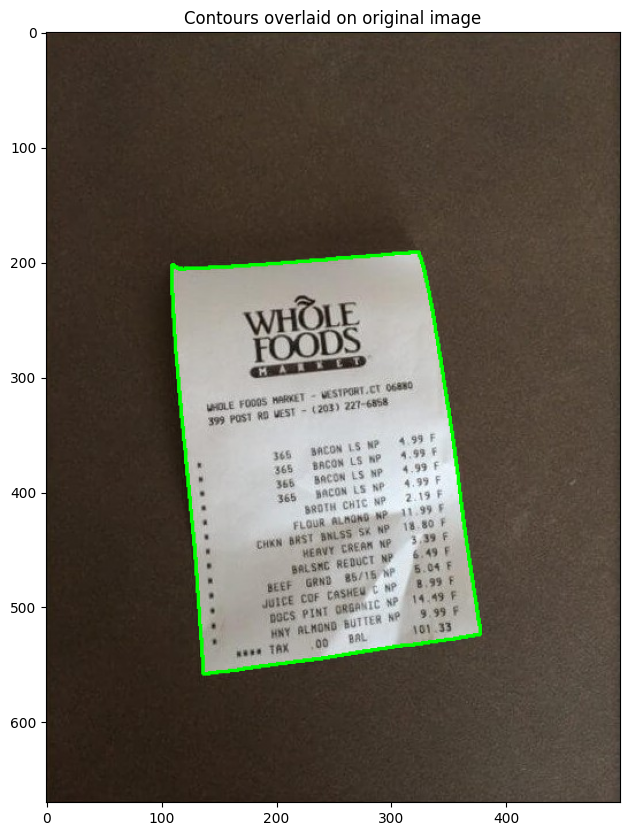

Number of Contours found = 1


In [2]:
image = cv2.imread("../images/scan.jpg")

# Convert to Grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

_, th2 = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
imshow("After thresholding", th2)

# Use a copy of your image e.g. edged.copy(), since findContours alters the image
contours, hierarchy = cv2.findContours(th2, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Draw all contours, note this overwrites the input image (inplace operation)
# Use '-1' as the 3rd parameter to draw all
cv2.drawContours(image, contours, -1, (0, 255,0), thickness = 2)
imshow("Contours overlaid on original image", image)

print("Number of Contours found = " + str(len(contours)))

### **Approximate our contour above to just 4 points using approxPolyDP** ###

In [4]:
# Sort contours large to small by area

sorted_contours = sorted(contours, key=cv2.contourArea, reverse=True)

# loop over the contours
for cnt in sorted_contours:
    # approximate the contour
    perimeter = cv2.arcLength(cnt, True)
    approx = cv2.approxPolyDP(cnt, 0.05 * perimeter, True)

    if len(approx) == 4:
        break

# Our x, y coordinates of the four corners
print("Our 4 corner points are:")
print(approx)

Our 4 corner points are:
[[[323 191]]

 [[109 203]]

 [[137 558]]

 [[377 523]]]


### **Use getPerspectiveTransform and warpPerspective to create our top down view** ###

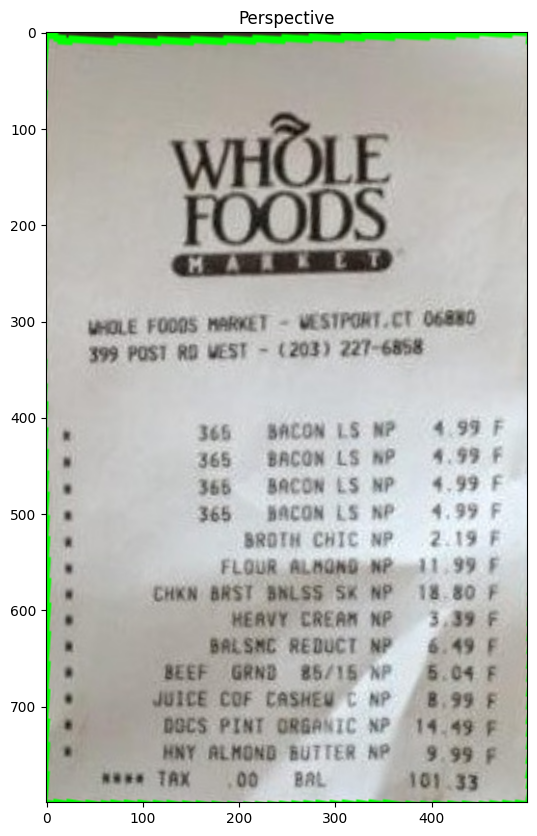

In [11]:
# Order obtained here is top left, bottom left, bottom right, top right
inputPts = np.float32(approx)

outputPts = np.float32([[500,0],
                       [0,0],
                       [0,800],
                       [500,800]])

# Get our Transform Matrix, M
M = cv2.getPerspectiveTransform(inputPts, outputPts)

# Apply the transform Matrix M using Warp Perspective
dst = cv2.warpPerspective(image, M, (500, 800))

imshow("Perspective", dst)